# Picking arrival times in seismic stack 

Stefan Nielsen, Durham University, May 2024

### 1) Edit filename and parameters for the shot gather
GEODE and SMARTSEIS data fihave been tested and compatible
### 2) Do the interactive arrival time picking
### 3) Save the picking to output file
### 4) Repeat...
### 5) Once all shot gathers are picked, use Seismic_Inversion_3_5 to process and invert first arrivals


## Initialisation cell

In [1]:
import matplotlib
import os
import subprocess
import ipympl
from ipywidgets import Button, HBox, VBox, widgets
%matplotlib ipympl
from Init_Picking_3_5 import *
lin_0, col_1, col_2, fpath, dat_file, shot_pos, geo_dx, moved_geo, new_pos, dummy  = box_widget()
VBox([lin_0, HBox([col_1, col_2])])

# 2) Pick arrival times in interactive graphic window (run next cell)
### !! use redvel=0.0 for picking !!
redvel is reduced velocity, to check horizon velocity replace with value in m/s. but use redvel=0.0 for picking (bypass reduction)<br>
Pick with **right-click** of mouse. A red circle appears for each picked trace.<br>
Use pan and zoom in/out if necessary (tools at bottom of figure)<br>
AGC is length of Automatic Gain Control window, use 0.0 to avoid AGC. <br> 
Scale amplifies each trace --redefine if needed<br> 
You can skip picking for some of the traces (e.g, poor or no signal), and do them in any order <br>
Can't undo single pick yet, sorry --to correct replot and then redo all picks

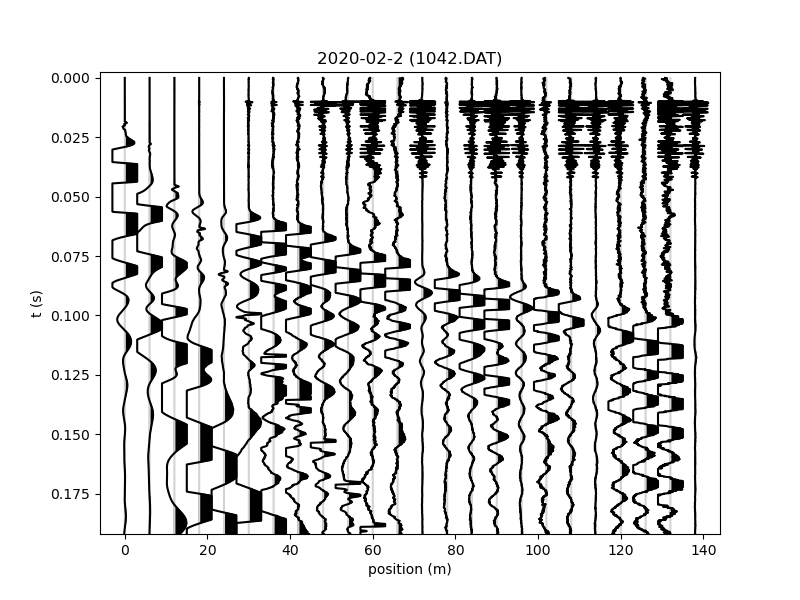

In [4]:
'''update and process the shot gather information entered:'''
dat2, path, infile, gpos, shotx, movedgeo, newpos, dx, dt, date = update_shot(fpath, dat_file, shot_pos, geo_dx, moved_geo, new_pos)
pos=[]
'''plot graphic interactive window:'''
fig,ax=plt.subplots(figsize=(8,6))
wiggle_plot(dat2, gpos, dx, date, path, infile, pos, shotx, movedgeo, newpos, fig, 
            dt, normalize=True, scale=3, AGC=0.0, redvel=0.0, clip=True)
cid=fig.canvas.mpl_connect('button_press_event', lambda event: onclick(event,pos))

# 3) SAVE your picking:
Ouput filename is automatically set based on input file name.

In [5]:
save_pick(pos, gpos, dat_file, fpath, shot_pos, moved_geo, new_pos, fig)

# 4) REPEAT for next shot gather...